# Problem Statement:
A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
So interpretation is important!

The solution is divided into the following sections:

### Data understanding and exploration
### Data Visualisation
### Data preparation
### Model building and evaluation

In [462]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [463]:
# Import libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [464]:
# Read CSV file and describe the attributes of the csv file
bike = pd.DataFrame(pd.read_csv("C:\\All_application_files\\upgrad\\bike_sharing_model\\Assingment_data_set\\day.csv"))

# Exploratory Data Anaysis (EDA)

In [465]:
print("Old Shape :")
print(bike.shape)


print(bike.info())
print(bike.dtypes)



Old Shape :
(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
instant         int64
dteday         object
season          int64


In [466]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Findings on raw data check:
Dataset has 730 rows and 16 columns.
Except one column(dteday), all other are either float or integer type.
dte column is date type.

There are some columns which are categorical in nature.

We will analyse and finalize whether to convert them to categorical or treat as integer.

# Data quality check on missing values

In [467]:
#Data Cleaning
# 1. Check for the duplicate entries
duplicate = bike[bike.duplicated()]
print("Count of Duplicate Rows :")
duplicate


Count of Duplicate Rows :


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [468]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [469]:
#Data Cleaning
#2 Find sum of rows having missing value
print(bike.isnull().all(axis=1).sum())

# Result = There is no empty rows

0


In [470]:
#Data Cleaning
#3 Find sum of col having missing value
print(bike.isnull().all(axis = 0).sum())


0


# EDA Observations :-

## There are no missing/ Null values either in columns or rows
## There were zero duplicate values in the dataset.


In [471]:
#Create a copy of the  dataframe, and drop the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

bike_day=bike.iloc[:,1:16]

In [472]:
for col in bike_day:
    print(bike_day[col].value_counts(), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

## Observations :-
###  There seems to be no Junk/Unknown values in the entire dataset.

## Understanding the Data Dictionary and parts of Data Preparation

### The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

The following variables can be removed from further analysis:

 1. **instant** : Its only an index value

 2. **dteday**:This has the date, Since we already have seperate columns for 'year' & 'month',hence it is not required

 3.  **casual & registered** : Both these columns contains the count of bike booked by different categories of customers.
Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

4.  We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation


In [473]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [474]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]


In [475]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Creating Dummy Variables

Create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 

Before creating dummy variables, we will have to convert them into 'category' data types.

In [476]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Convert following data  to 'category' data type

## bike_new['season']=bike_new['season'].astype('category')
## bike_new['weathersit']=bike_new['weathersit'].astype('category')
## bike_new['mnth']=bike_new['mnth'].astype('category')
## bike_new['weekday']=bike_new['weekday'].astype('category')


In [477]:
bike_new['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [478]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
bike_new.loc[(bike_new['season'] == 1) , 'season'] = 'spring'

# 2=summer
bike_new.loc[(bike_new['season'] == 2) , 'season'] = 'summer'

# 3=fall
bike_new.loc[(bike_new['season'] == 3) , 'season'] = 'fall'

# 4=winter
bike_new.loc[(bike_new['season'] == 4) , 'season'] = 'winter'

In [479]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [480]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
bike_new['season'] = bike_new['season'].astype('category')

In [481]:
bike_new['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [482]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    int64   
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    int64   
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(1), float64(4), int64(7)
memory usage: 63.8 KB


In [483]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
bike_new[['mnth']] = bike_new[['mnth']].apply(object_map)

In [484]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
bike_new['mnth'] = bike_new['mnth'].astype('category')


In [485]:
bike_new.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [486]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    int64   
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(2), float64(4), int64(6)
memory usage: 59.2 KB


In [328]:
bike_new['mnth'].value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [329]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 0: 'Sun'})

# Applying the function to the two columns
bike_new[['weekday']] = bike_new[['weekday']].apply(str_map)

In [330]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [331]:
bike_new['weekday'].value_counts()

Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: weekday, dtype: int64

In [332]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
bike_new['weekday'] = bike_new['weekday'].astype('category')


In [333]:
bike_new['weekday'].value_counts()

Mon    105
Sat    105
Sun    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: weekday, dtype: int64

In [334]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [335]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
bike_new.loc[(bike_new['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
bike_new.loc[(bike_new['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
bike_new.loc[(bike_new['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bike_new.loc[(bike_new['weathersit'] == 4) , 'weathersit'] = 'D'

In [336]:
# Extracting the type of weather situations present in the data
bike_new['weathersit'].unique()

array(['B', 'A', 'C'], dtype=object)

In [337]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,B,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,B,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,A,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,A,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,A,9.305237,11.46350,43.6957,12.522300,1600


In [338]:
bike_new['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [339]:
# Taking count based on weather situations
bike_new['weathersit'] = bike_new['weathersit'].astype('category')

In [340]:
bike_new['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [341]:
# Now check given data is category after conversion

# bike_new['season']=bike_new['season'].astype('category')
#bike_new['weathersit']=bike_new['weathersit'].astype('category')
#bike_new['mnth']=bike_new['mnth'].astype('category')
#bike_new['weekday']=bike_new['weekday'].astype('category')

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [342]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,B,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,B,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,A,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,A,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,A,9.305237,11.46350,43.6957,12.522300,1600


In [343]:
#Auto EDA
% pip install sweetviz

#import sweetviz as sv
#sweet_report = sv.analyze(bike_new)
#sweet_report.show_html('sweet_report.html')

UsageError: Line magic function `%` not found.


In [344]:
import sweetviz as sv
sweet_report = sv.analyze(bike_new)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [345]:
sweet_report.show_html('sweet_report.html')

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we will also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

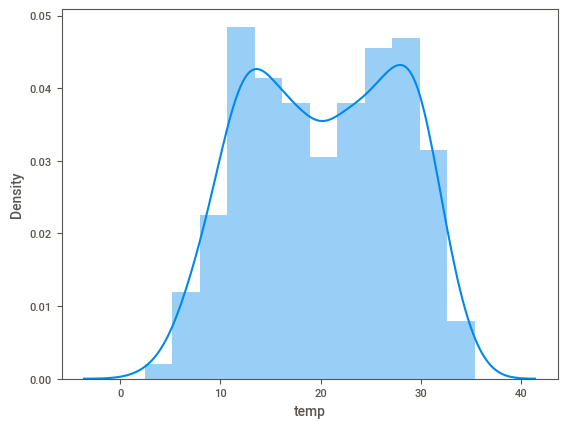

In [346]:
# temperature
sns.distplot(bike_new['temp'])
plt.show()

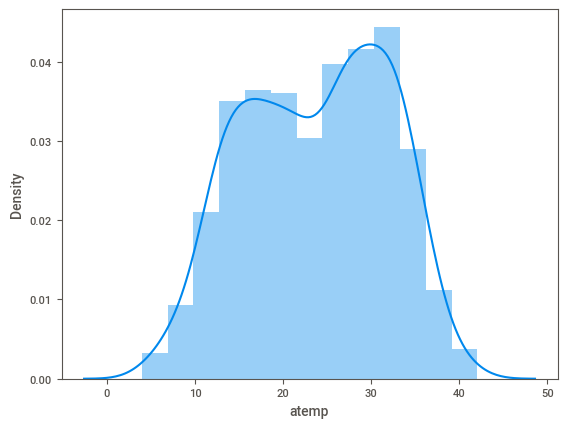

In [347]:
# feeling temperature
sns.distplot(bike_new['atemp'])
plt.show()

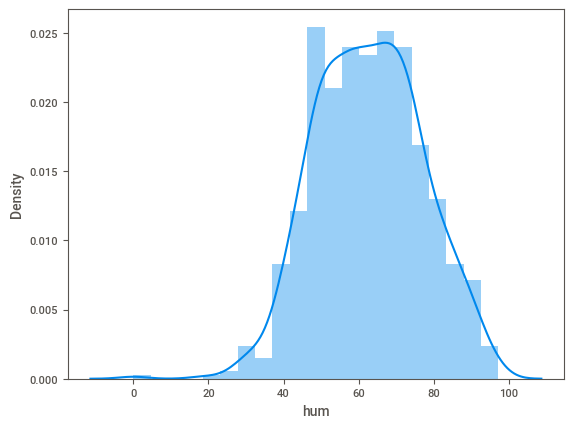

In [348]:
# humidity
sns.distplot(bike_new['hum'])
plt.show()

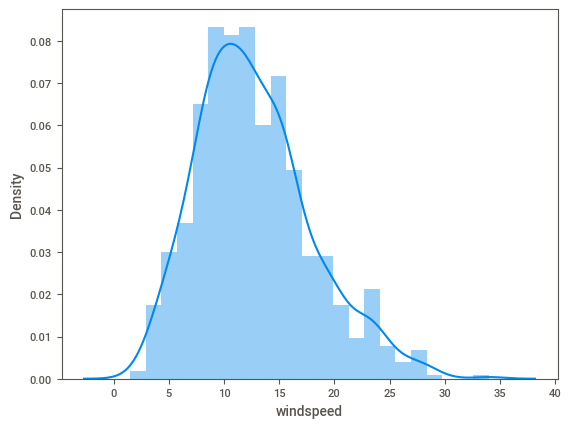

In [349]:
# wind speed
sns.distplot(bike_new['windspeed'])
plt.show()

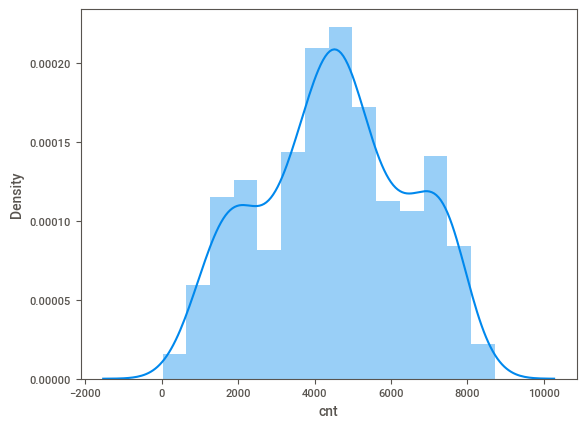

In [350]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(bike_new['cnt'])
plt.show()

In [351]:
# All categorical variables in the dataset
bike_new_day_categorical=bike_new.select_dtypes(exclude=['float64','datetime64','int64'])
print(bike_new_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [352]:
bike_new_day_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thu,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


## Visualising Catagorical Variables

Let's make a boxplot for some of the categorical variables.


In [353]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.


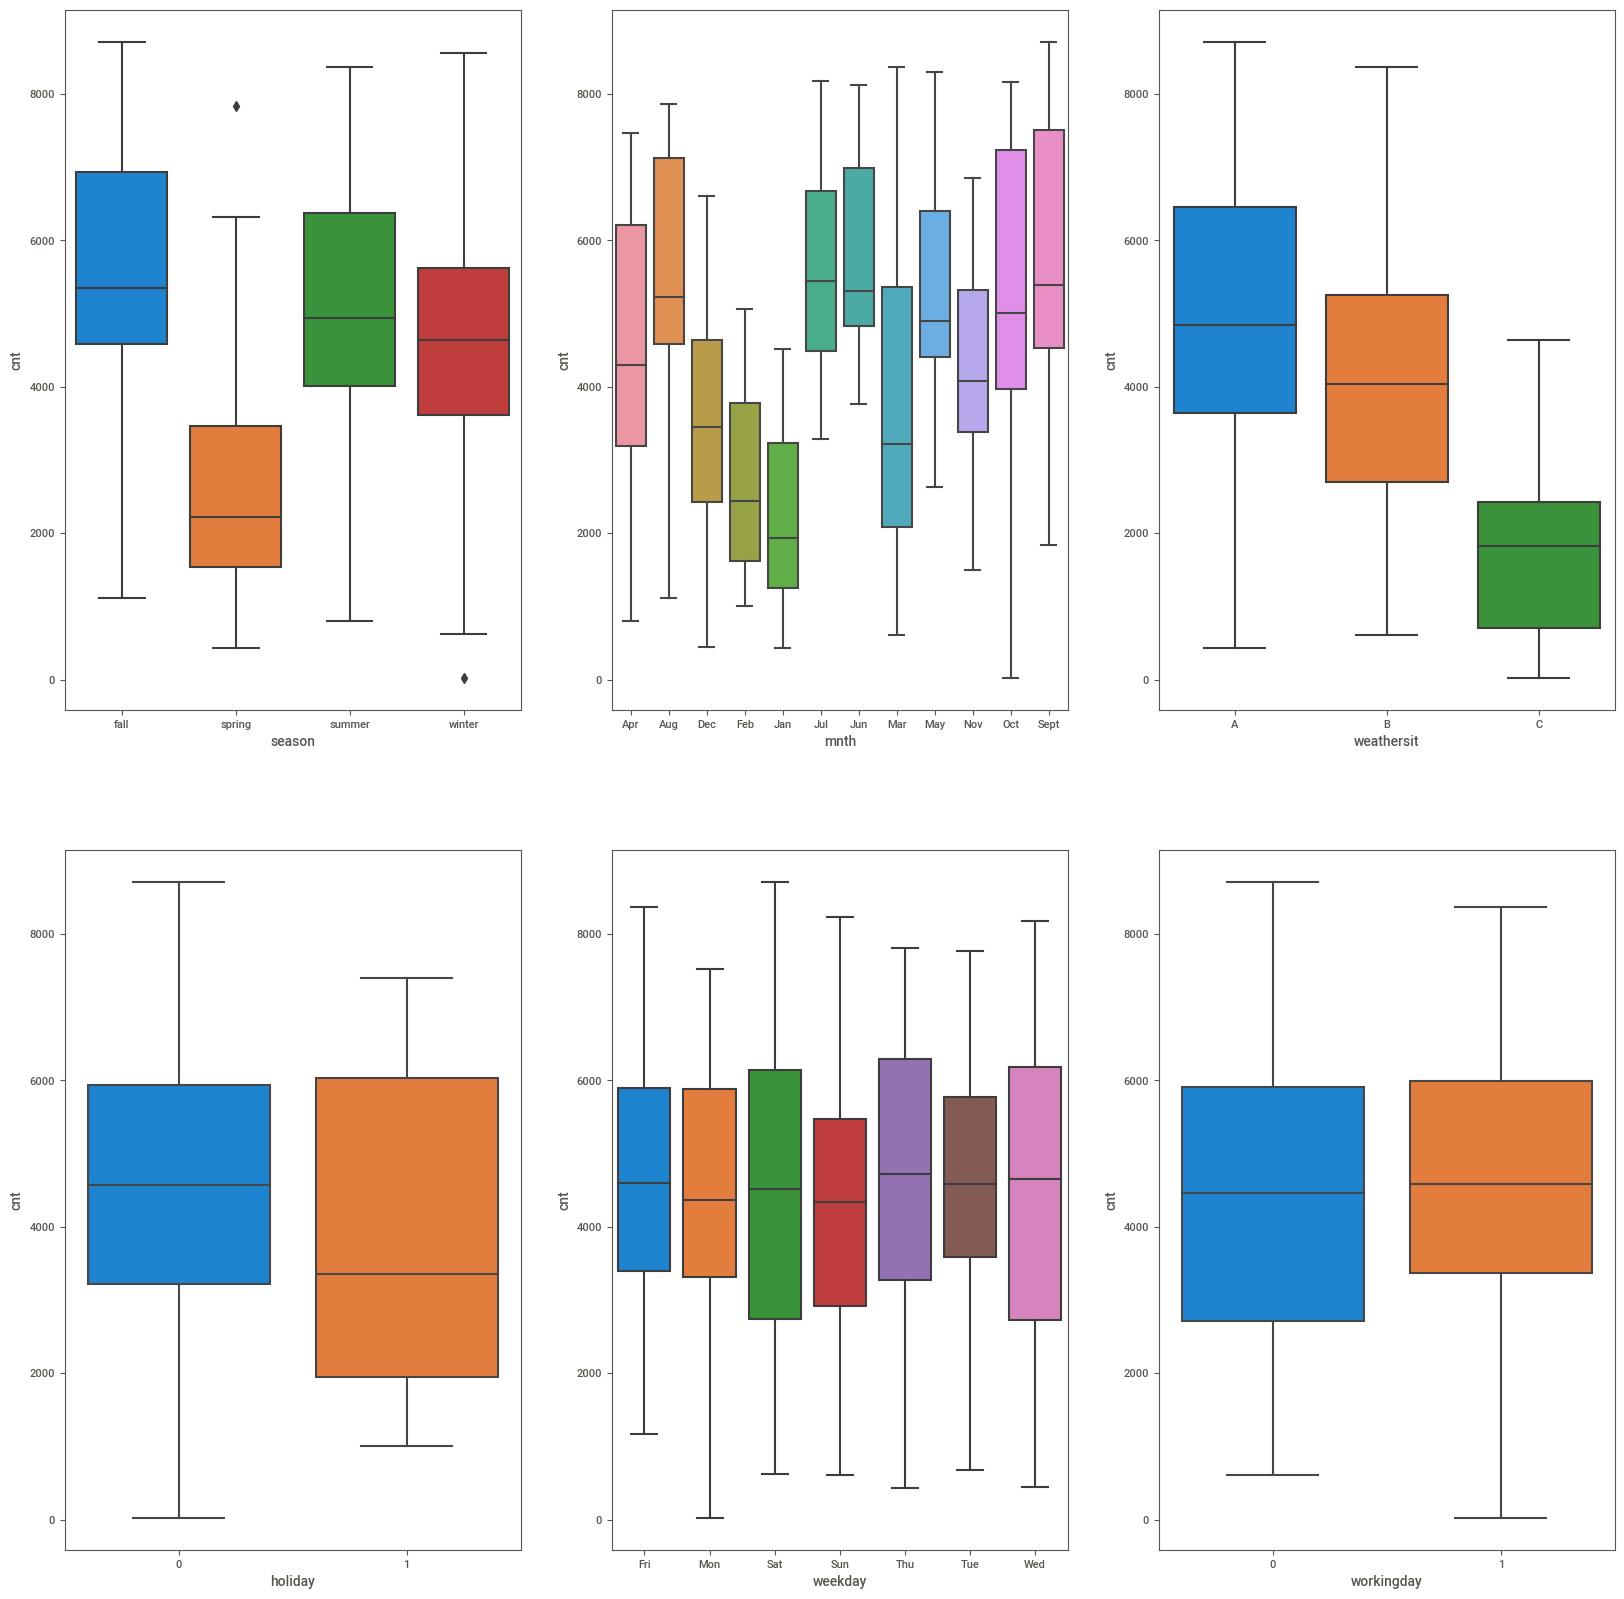

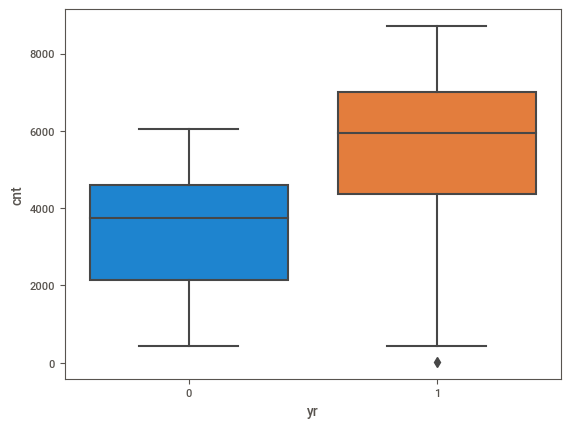

In [354]:
plt.figure(figsize=(20, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.show()
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.show()

## Observations :
There were 6 categorical variables in the dataset.

Box plot is used (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

 1. **season**:   Around 32% of the bike booking were happening in fall with a median of over 5000 booking (for the period of 2 years). This was followed by summer & winter with 27% & 25% of total booking. This indicates season can be a good predictor for the dependent variable.

 2. **mnth**: Almost 10% of the bike booking were happening in the months "may,june,july,august & sept" (5,6,7,8 & 9) with a median of over 4000 booking per month. This indicates mnth can be a good predictor for the dependent variable.

 3. **weathersit**: Almost 67% of the bike booking were happening during ‘weathersit-1" ie "A" with a median of close to 5000 booking (for the period of 2 years). This was followed by "weathersit-2" ie "B" with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

4. **holiday**: Almost 98% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday cannot be a good predictor for the dependent variable.

5. **weekday**: weekday variable shows very close trend  on all days of the week having their  medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. Let the model decide if this needs to be added or not.

6. **workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

7. **yr**: This shows increase in trend with base year(2018) median below 4000 and subsesquent year as "2019" as median  near 6000. This can be a good predictor for the dependent variable

## Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [355]:
# All numeric variables in the dataset along with target variable
bike_num=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
bike_num.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


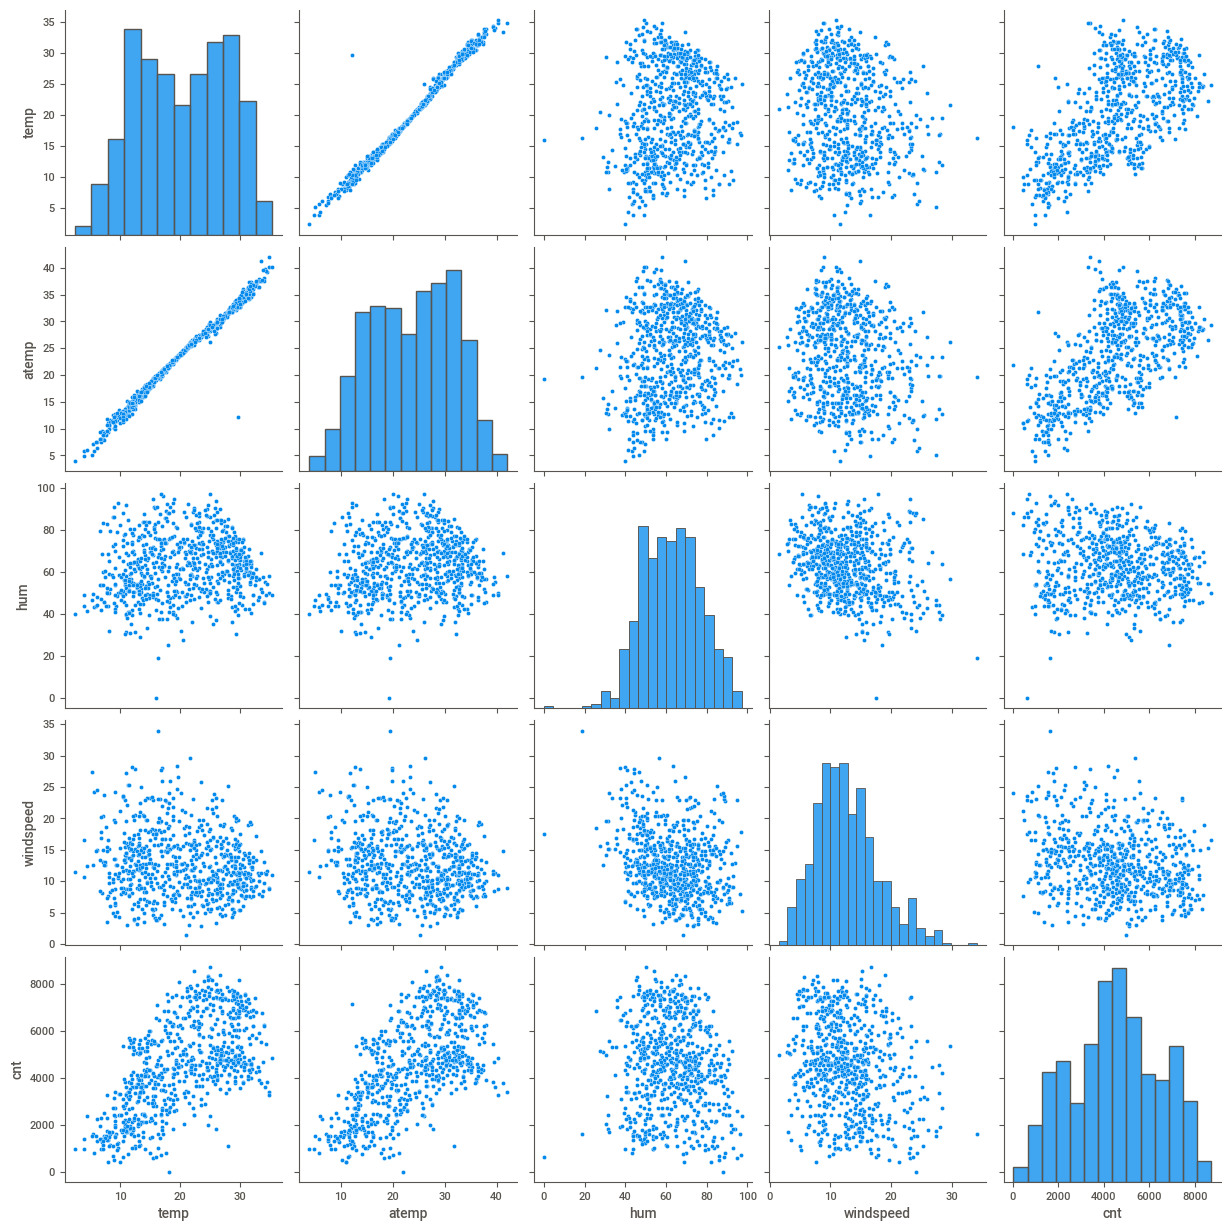

In [356]:
# Pairwise scatter plot
sns.pairplot(bike_num)
plt.show()

## Observations :-

### Above Pair-Plot tells us that there is a Linear relation between 'temp','atemp' and 'cnt'


## Correlation Matrix

In [357]:
# Correlation matrix
cor = bike_num.corr()
cor

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


Let's plot the correlations on a heatmap for better visualisation

<AxesSubplot:>

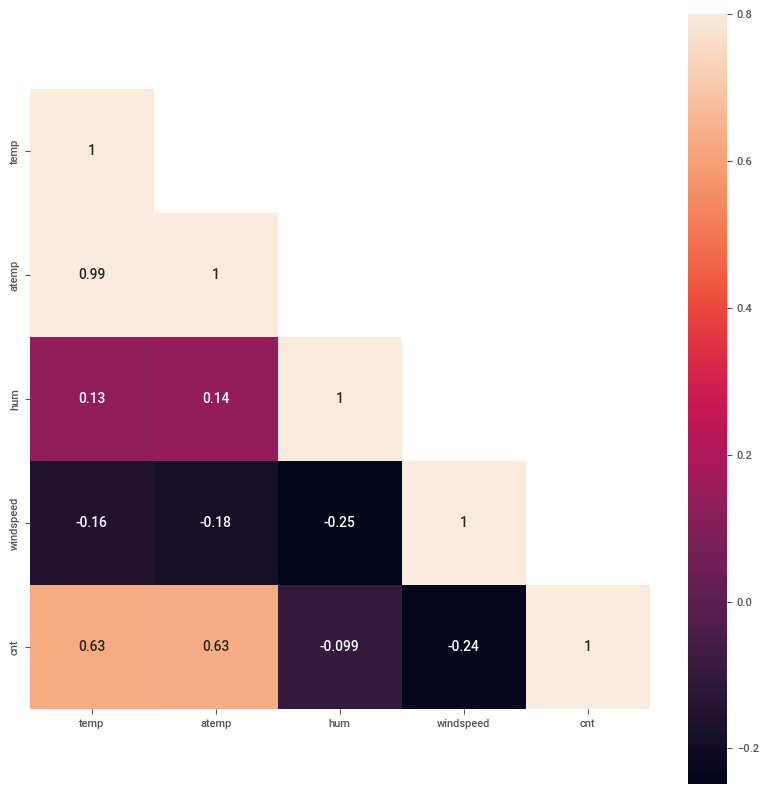

In [358]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.

- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

In [359]:
#Removing atemp as it is highly correlated with temp
bike_new.drop('atemp',axis=1,inplace=True)    

In [360]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,A,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,1600


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

# Creating Dummy Variables


Create Dummy variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

In [361]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   season_spring  730 non-null    uint8  
 8   season_summer  730 non-null    uint8  
 9   season_winter  730 non-null    uint8  
 10  mnth_Aug       730 non-null    uint8  
 11  mnth_Dec       730 non-null    uint8  
 12  mnth_Feb       730 non-null    uint8  
 13  mnth_Jan       730 non-null    uint8  
 14  mnth_Jul       730 non-null    uint8  
 15  mnth_Jun       730 non-null    uint8  
 16  mnth_Mar       730 non-null    uint8  
 17  mnth_May       730 non-null    uint8  
 18  mnth_Nov  

In [362]:
bike_new.head()
bike_new.shape

(730, 29)

## 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

## SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this

In [363]:
# Check the shape before spliting

bike_new.shape

(730, 29)

In [364]:
# Check the info before spliting

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   season_spring  730 non-null    uint8  
 8   season_summer  730 non-null    uint8  
 9   season_winter  730 non-null    uint8  
 10  mnth_Aug       730 non-null    uint8  
 11  mnth_Dec       730 non-null    uint8  
 12  mnth_Feb       730 non-null    uint8  
 13  mnth_Jan       730 non-null    uint8  
 14  mnth_Jul       730 non-null    uint8  
 15  mnth_Jun       730 non-null    uint8  
 16  mnth_Mar       730 non-null    uint8  
 17  mnth_May       730 non-null    uint8  
 18  mnth_Nov  

In [365]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_new_train, bike_new_test = train_test_split(bike_new, train_size=0.7, test_size=0.3, random_state=100)

In [366]:
bike_new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   temp           510 non-null    float64
 4   hum            510 non-null    float64
 5   windspeed      510 non-null    float64
 6   cnt            510 non-null    int64  
 7   season_spring  510 non-null    uint8  
 8   season_summer  510 non-null    uint8  
 9   season_winter  510 non-null    uint8  
 10  mnth_Aug       510 non-null    uint8  
 11  mnth_Dec       510 non-null    uint8  
 12  mnth_Feb       510 non-null    uint8  
 13  mnth_Jan       510 non-null    uint8  
 14  mnth_Jul       510 non-null    uint8  
 15  mnth_Jun       510 non-null    uint8  
 16  mnth_Mar       510 non-null    uint8  
 17  mnth_May       510 non-null    uint8  
 18  mnth_Nov 

In [367]:
bike_new_train.shape

(510, 29)

In [368]:
bike_new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   holiday        219 non-null    int64  
 2   workingday     219 non-null    int64  
 3   temp           219 non-null    float64
 4   hum            219 non-null    float64
 5   windspeed      219 non-null    float64
 6   cnt            219 non-null    int64  
 7   season_spring  219 non-null    uint8  
 8   season_summer  219 non-null    uint8  
 9   season_winter  219 non-null    uint8  
 10  mnth_Aug       219 non-null    uint8  
 11  mnth_Dec       219 non-null    uint8  
 12  mnth_Feb       219 non-null    uint8  
 13  mnth_Jan       219 non-null    uint8  
 14  mnth_Jul       219 non-null    uint8  
 15  mnth_Jun       219 non-null    uint8  
 16  mnth_Mar       219 non-null    uint8  
 17  mnth_May       219 non-null    uint8  
 18  mnth_Nov 

In [369]:
bike_new_test.shape

(219, 29)

## Scaling
Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as we don't want it to learn anything from the test data.

Let's scale all these columns using MinMaxScaler. You can use any other scaling method as well; it is totally up to you.

In [370]:
from sklearn.preprocessing import MinMaxScaler 

In [371]:
scaler = MinMaxScaler()

In [372]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

bike_new_train[var] = scaler.fit_transform(bike_new_train[var])

In [373]:
bike_new_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.764151,0,1,0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.832835,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.218017,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.312586,0,0,1,...,0,0,0,1,0,0,0,0,1,0


As expected, the variables have been appropriately scaled.

In [374]:
bike_new_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


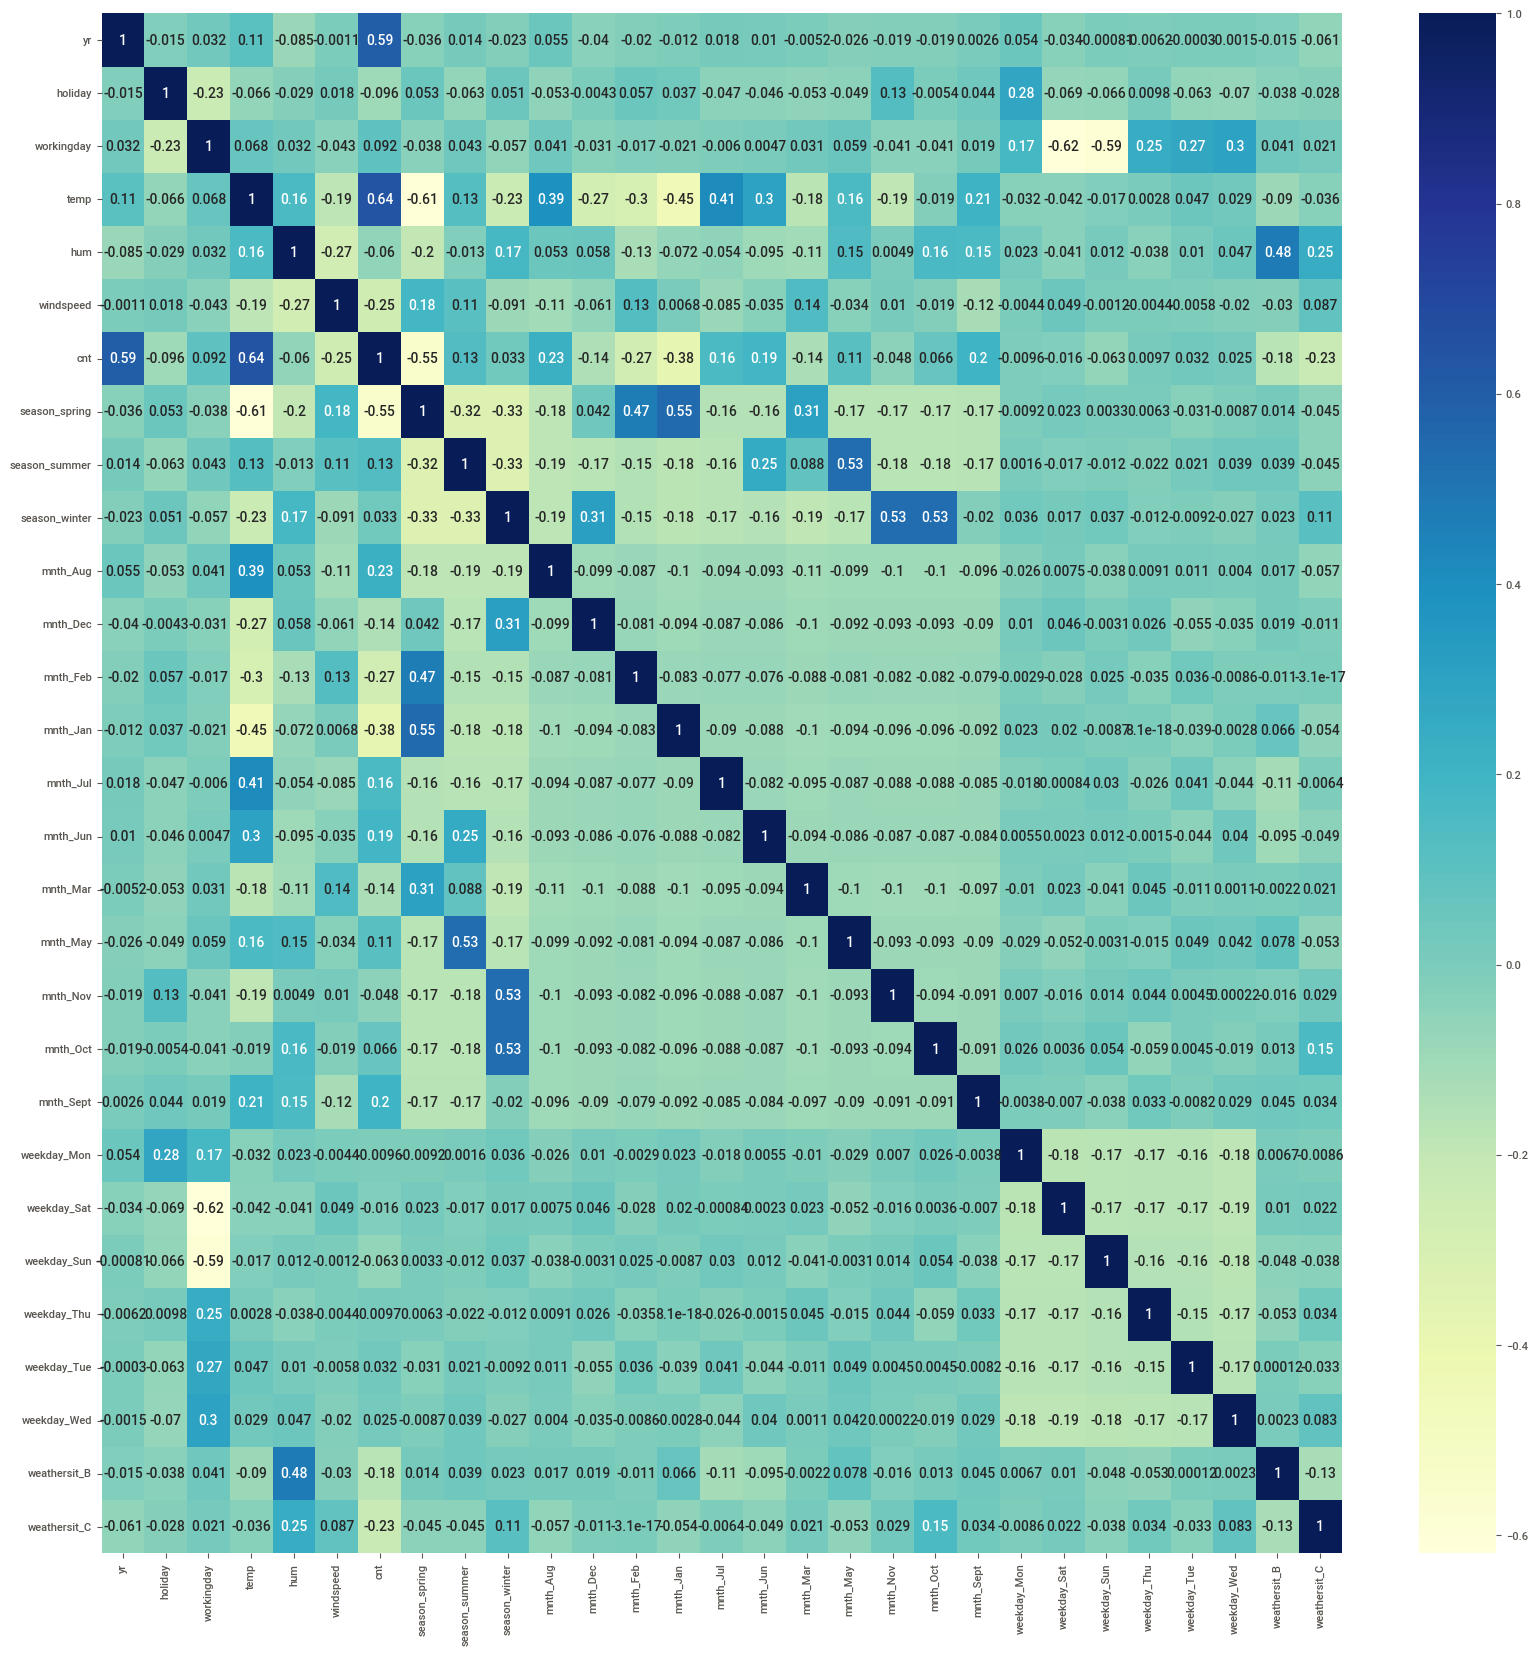

In [375]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 20))
sns.heatmap(bike_new_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, temp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt.

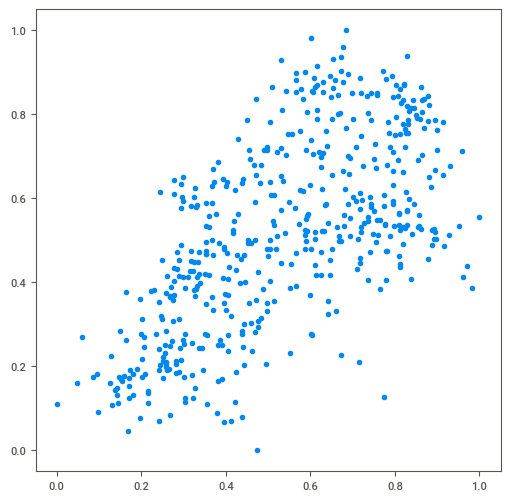

In [376]:
plt.figure(figsize=[6,6])
plt.scatter(bike_new_train.temp, bike_new_train.cnt)
plt.show()

As you might have noticed, "yr" seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt.

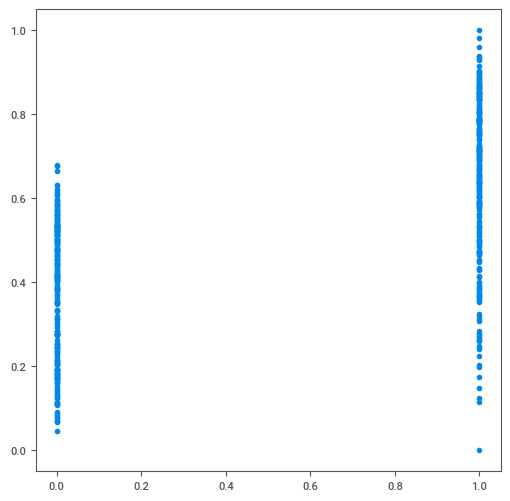

In [377]:
plt.figure(figsize=[6,6])
plt.scatter(bike_new_train.yr, bike_new_train.cnt)
plt.show()

There is increase as we increase from the base year ie moving from 2018 to 2019

# BUILDING A LINEAR MODEL

## Dividing into X and Y sets for the model building

In [378]:
y_train = bike_new_train.pop('cnt')
X_train = bike_new_train

In [379]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(bike_new_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [380]:
bike_new_train.shape

(510, 28)

### Building the first model with all the features

Let's now build our first model with all the features.

In [381]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.245085
yr               0.232116
holiday          0.009959
workingday       0.096884
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sept        0.081060
weekday_Mon     -0.020907
weekday_Sat      0.096389
weekday_Sun      0.041853
weekday_Thu     -0.009237
weekday_Tue     -0.018890
weekday_Wed     -0.005388
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [382]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [383]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.32249766e-01 -4.99443413e+11 -4.99443413e+11  4.50469971e-01
 -1.51412964e-01 -1.86772346e-01 -4.78515625e-02  3.84216309e-02
  1.06262207e-01  1.41601562e-02 -4.61273193e-02 -3.31039429e-02
 -6.34384155e-02 -4.06951904e-02 -3.33786011e-03  1.10244751e-03
  2.41394043e-02 -4.26635742e-02  6.47735596e-03  8.05053711e-02
 -2.10876465e-02 -4.99443413e+11 -4.99443413e+11 -9.28497314e-03
 -1.89332962e-02 -5.39493561e-03 -6.08215332e-02 -2.57156372e-01]
499443413105.6656


In [384]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          8.74e-182
Time:                        12:39:51   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.035      6.955      0.000       0.176       0.314
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0100      0.024      0.415      0.678      -0.037       0.057
workingday        0.0969      0.012      7.905      0.000       0.073       0.121
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sept         0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon      -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat       0.0964      0.014      7.029      0.000       0.069       0.123
weekday_Sun       0.0419      0.014      3.006      0.003       0.014       0.069
weekday_Thu      -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tue      -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed      -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.50e+15
================================================================

This model has an Adjusted R-squared value of **84.5%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable. 

### RFE
Recursive feature elimination: We will be using the **LinearRegression function from SciKit Learn** 
Now, we have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the statsmodels library to build models using the shortlisted features (this is also because SKLearn doesn't have Adjusted R-squared that statsmodels has).

In [385]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [386]:
# RFE with 15 features
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=15,step=1)

# Fit with 15 features
rfe.fit(X_train, y_train)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)  

[ True  True  True  True  True  True  True  True  True False False False
 False  True False False False False False  True False  True  True False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  7  4  5  2  1 13 14  6  3 10  1  8  1  1 11
  9 12  1  1]


In [387]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sept', 'weekday_Sat', 'weekday_Sun', 'weathersit_B',
       'weathersit_C'],
      dtype='object')

## Model Building and Evaluation 
## Check the summary of this model using `statsmodels`.

In [388]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col = X_train.columns[rfe.support_]

# Subsetting training data for 15 selected columns
X_train_rfe = X_train[col]

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sept,weekday_Sat,weekday_Sun,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,1,0


## Model 1

In [389]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.13e-191
Time:                        12:39:52   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1989      0.028      7.181

## Insights
Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from **84.5%** to **84.3%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [390]:
X_train_rfe =X_train_rfe.drop('const',axis=1)

In [391]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
11,weekday_Sat,12.20
12,weekday_Sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
13,weathersit_B,1.57


In [392]:
import statsmodels.api as sm

# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm2).fit()

In [393]:
# Check the parameters obtained

lr1.params

const            0.198900
yr               0.229738
holiday         -0.018955
workingday       0.083695
temp             0.527819
hum             -0.159467
windspeed       -0.180601
season_spring   -0.055434
season_summer    0.052613
season_winter    0.100294
mnth_Jul        -0.054881
mnth_Sept        0.081773
weekday_Sat      0.093682
weekday_Sun      0.040479
weathersit_B    -0.057847
weathersit_C    -0.246332
dtype: float64

In [394]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.13e-191
Time:                        12:39:53   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1989      0.028      7.181

## Model 2

## Removing the variable 'holiday' based on its High p-value

In [395]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

## VIF Check

In [396]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,weekday_Sat,4.91
4,windspeed,4.90
5,season_spring,4.80
11,weekday_Sun,4.76
7,season_winter,3.71
6,season_summer,3.03
12,weathersit_B,2.31


In [397]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [398]:
# Check the parameters obtained

lr2.params

const            0.179945
yr               0.229738
workingday       0.102650
temp             0.527819
hum             -0.159467
windspeed       -0.180601
season_spring   -0.055434
season_summer    0.052613
season_winter    0.100294
mnth_Jul        -0.054881
mnth_Sept        0.081773
weekday_Sat      0.112637
weekday_Sun      0.059434
weathersit_B    -0.057847
weathersit_C    -0.246332
dtype: float64

In [399]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.13e-191
Time:                        12:39:55   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1799      0.042      4.276

## Model 3

 - Removing the variable 'hum' based on its Very High 'VIF' value.
 

In [400]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF Check

In [401]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
9,weekday_Sat,4.45
10,weekday_Sun,4.21
4,season_spring,3.82
6,season_winter,2.80
5,season_summer,2.75
0,yr,2.07
7,mnth_Jul,1.60


In [402]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [403]:
lr3.params

const            0.100521
yr               0.233626
workingday       0.103407
temp             0.492017
windspeed       -0.149124
season_spring   -0.065288
season_summer    0.046496
season_winter    0.085870
mnth_Jul        -0.049971
mnth_Sept        0.075781
weekday_Sat      0.115156
weekday_Sun      0.057148
weathersit_B    -0.083515
weathersit_C    -0.290444
dtype: float64

In [404]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          5.73e-189
Time:                        12:39:56   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1005      0.038      2.618

## Model 4

- Removing the variable 'workingday' based on its Very High 'VIF' value.

In [405]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [406]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,season_summer,2.23
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
6,mnth_Jul,1.59
10,weathersit_B,1.55
7,mnth_Sept,1.33
8,weekday_Sat,1.22


In [407]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [408]:
lr4.params

const            0.200531
yr               0.234126
temp             0.493363
windspeed       -0.151323
season_spring   -0.067880
season_summer    0.046884
season_winter    0.082950
mnth_Jul        -0.049155
mnth_Sept        0.072144
weekday_Sat      0.015705
weekday_Sun     -0.042224
weathersit_B    -0.081613
weathersit_C    -0.285761
dtype: float64

In [409]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.01e-186
Time:                        12:39:58   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2005      0.030      6.771

## Model 5

Removing the variable 'weekday_Sat' based on its high P-value

X_train_new = X_train_new.drop(["weekday_Sat"], axis = 1)

In [410]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,season_summer,2.23
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
6,mnth_Jul,1.59
10,weathersit_B,1.55
7,mnth_Sept,1.33
8,weekday_Sat,1.22


In [411]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [412]:
lr5.params

const            0.200531
yr               0.234126
temp             0.493363
windspeed       -0.151323
season_spring   -0.067880
season_summer    0.046884
season_winter    0.082950
mnth_Jul        -0.049155
mnth_Sept        0.072144
weekday_Sat      0.015705
weekday_Sun     -0.042224
weathersit_B    -0.081613
weathersit_C    -0.285761
dtype: float64

In [413]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.01e-186
Time:                        12:39:59   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2005      0.030      6.771

## Model 6

Removing the variable 'season_summer' based on its high VIF-value after "temp" and "windspeed". Based on knowledge not removing "temp" and "windspeed" as it can be a important. Let see what imapct is there.

In [414]:
X_train_new = X_train_new.drop(["season_summer"], axis = 1)

In [415]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.72
2,windspeed,4.04
0,yr,2.06
3,season_spring,1.66
9,weathersit_B,1.51
4,season_winter,1.41
5,mnth_Jul,1.35
7,weekday_Sat,1.22
6,mnth_Sept,1.20
8,weekday_Sun,1.20


In [416]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [417]:
lr6.params

const            0.254571
yr               0.234754
temp             0.451895
windspeed       -0.142859
season_spring   -0.113305
season_winter    0.045840
mnth_Jul        -0.070191
mnth_Sept        0.052492
weekday_Sat      0.015435
weekday_Sun     -0.041637
weathersit_B    -0.081138
weathersit_C    -0.286966
dtype: float64

In [418]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          7.06e-186
Time:                        12:40:00   Log-Likelihood:                 495.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     498   BIC:                            -916.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2546      0.024     10.580

### From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. Also have the variables have VIF < 5. There seems to be VERY LOW Multicollinearity between the predictors.Also the Adjusted R-squared value has dropped from 84.5% with 28 variables to just 83.0% using 9 variables. 

### The model seems to be doing a good job. 


### Residual Analysis Of Training Data

Before we make predictions on the test set, let's first analyse the residuals.
### Assumptions :
## Error terms are normally distributed with mean zero (not X, Y)


In [419]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

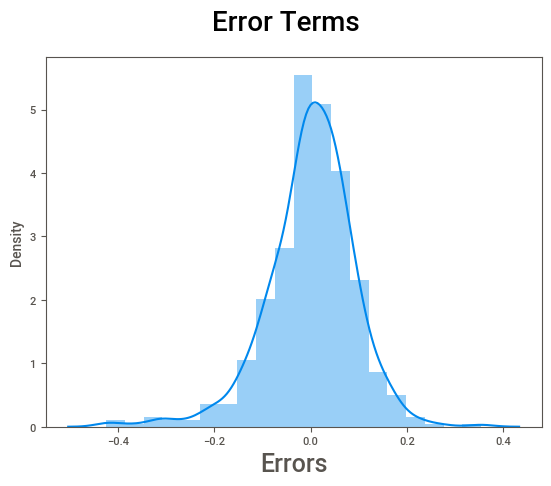

In [420]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## Multi Colinearity


In [434]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.72
2,windspeed,4.04
0,yr,2.06
3,season_spring,1.66
9,weathersit_B,1.51
4,season_winter,1.41
5,mnth_Jul,1.35
7,weekday_Sat,1.22
6,mnth_Sept,1.20
8,weekday_Sun,1.20


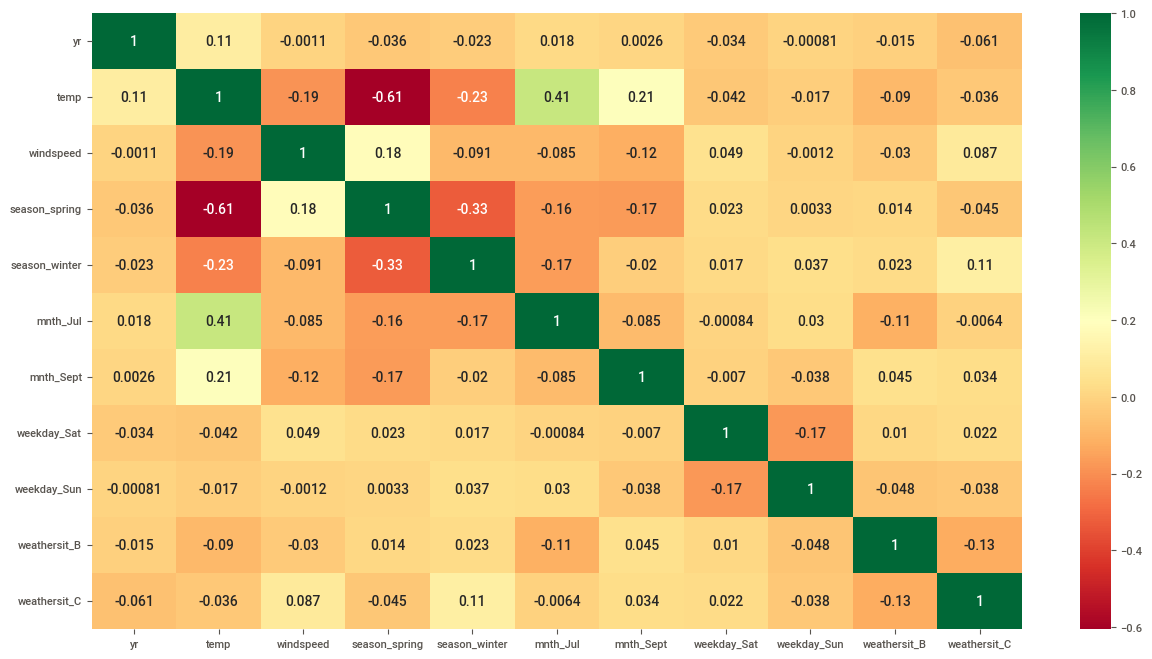

In [435]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

### VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap

## Linearity


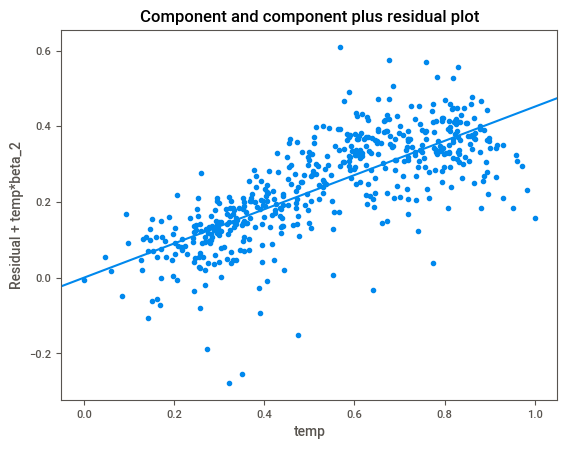

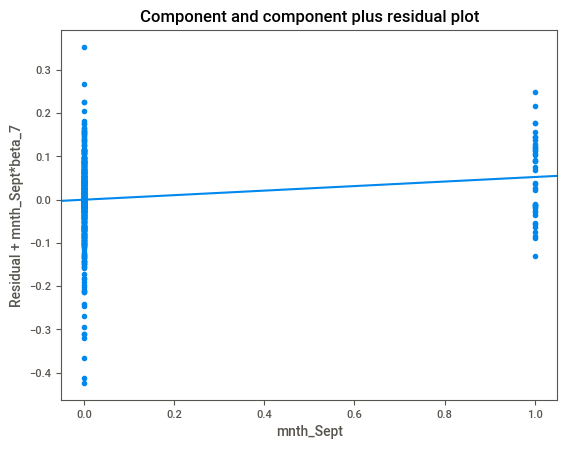

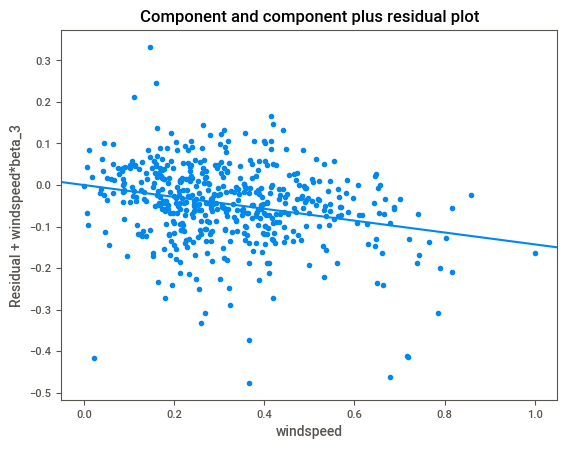

In [438]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr6, 'mnth_Sept')
plt.show()

sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

### Linearity can be observed from above visualizations.

## Homoscedasticity

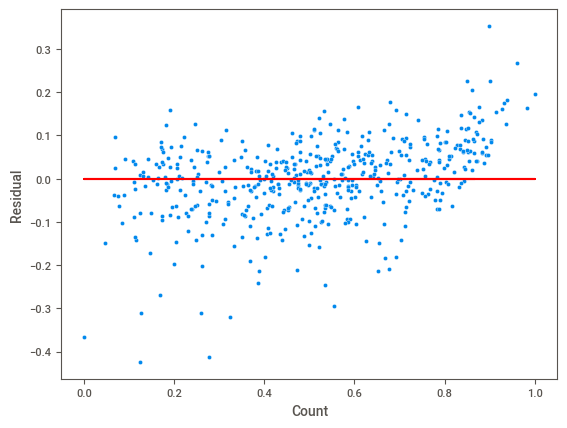

In [441]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### No visible pattern observed from above plot for residuals.

## Independence of residuals
### Durbin-Watson value of final model lr6 is 1.977, which signifies there is no autocorrelation.

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [421]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars_1 = ['temp', 'hum', 'windspeed','cnt']

bike_new_test[num_vars_1] = scaler.transform(bike_new_test[num_vars_1])

In [422]:
bike_new_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [423]:
bike_new_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [424]:
y_test = bike_new_test.pop('cnt')
X_test = bike_new_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   holiday        219 non-null    int64  
 2   workingday     219 non-null    int64  
 3   temp           219 non-null    float64
 4   hum            219 non-null    float64
 5   windspeed      219 non-null    float64
 6   season_spring  219 non-null    uint8  
 7   season_summer  219 non-null    uint8  
 8   season_winter  219 non-null    uint8  
 9   mnth_Aug       219 non-null    uint8  
 10  mnth_Dec       219 non-null    uint8  
 11  mnth_Feb       219 non-null    uint8  
 12  mnth_Jan       219 non-null    uint8  
 13  mnth_Jul       219 non-null    uint8  
 14  mnth_Jun       219 non-null    uint8  
 15  mnth_Mar       219 non-null    uint8  
 16  mnth_May       219 non-null    uint8  
 17  mnth_Nov       219 non-null    uint8  
 18  mnth_Oct 

In [425]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   windspeed      219 non-null    float64
 4   season_spring  219 non-null    uint8  
 5   season_winter  219 non-null    uint8  
 6   mnth_Jul       219 non-null    uint8  
 7   mnth_Sept      219 non-null    uint8  
 8   weekday_Sat    219 non-null    uint8  
 9   weekday_Sun    219 non-null    uint8  
 10  weathersit_B   219 non-null    uint8  
 11  weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 10.3 KB


In [426]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

# MODEL EVALUATION

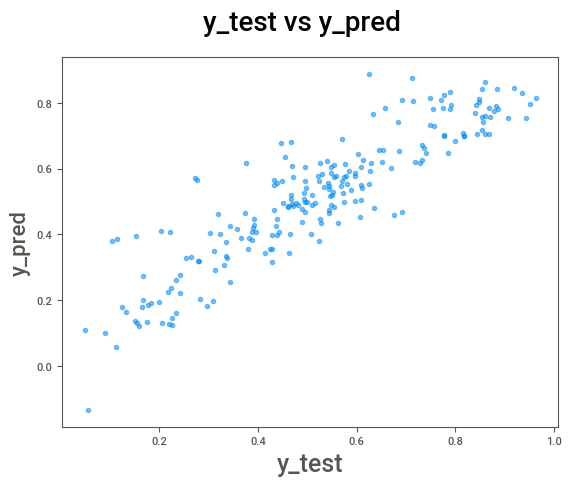

In [427]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

 # R^2 Value for TEST

In [428]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8090249807379293

## Adjusted R^2 Value for TEST

In [429]:
# We already have the value of R^2 (calculated in above step)

r2=0.8203092200749708

In [430]:
# Get the shape of X_test
X_test.shape


(219, 11)

In [431]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8107604346683267

### Checking the correlations between the final predictor variables

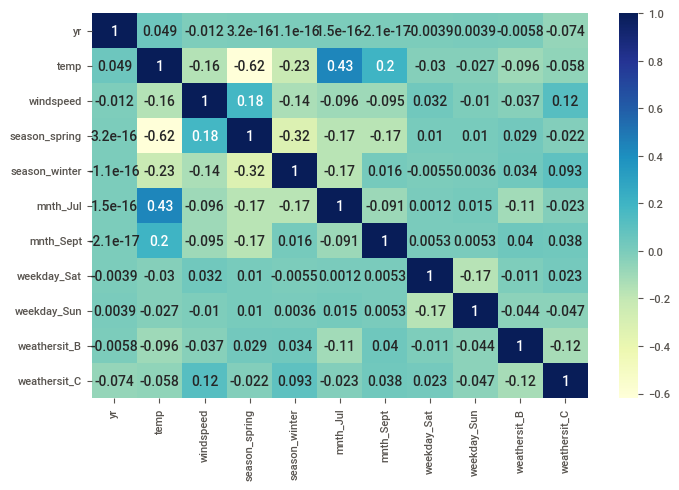

In [432]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike_new[col1].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations. 

Thus, the final model consists of the 9 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.


In [442]:
round(lr6.params,4)

const            0.2546
yr               0.2348
temp             0.4519
windspeed       -0.1429
season_spring   -0.1133
season_winter    0.0458
mnth_Jul        -0.0702
mnth_Sept        0.0525
weekday_Sat      0.0154
weekday_Sun     -0.0416
weathersit_B    -0.0811
weathersit_C    -0.2870
dtype: float64

### We can see that the equation of our best fitted line is:

cnt = 0.2546 + 0.2348*yr + 0.4519*temp -0.1429*windspeed -0.1133*season_spring + 0.0458*season_winter -0.0702*mnth_Jul + 0.0525* mnth_Sept + 0.0154* weekday_Sat -0.0416*weekday_Sun -0.0811*weathersit_B -0.2870*weathersit_C

# Final Result Comparison

- Train R^2 :0.0.833
- Train Adjusted R^2 :0.830 
- Test R^2 :808
- Test Adjusted R^2 :0.812
- This seems to be a really good model that can very well 'Generalize' various datasets.

As per our final Model, the top 3 predictor variables that influences the bike booking are:

  . **Temperature (temp)** - A coefficient value of **‘0.4509’** indicated that a unit increase in temp variable increases the bike hire numbers by **'0.4509'** units.
  
  . **Weather Situation 3 (weathersit_C)** - A coefficient value of **‘-0.2868’** indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by **'-0.2868'** units.
  
  . **Year (yr)** - A coefficient value of **‘0.2344’** indicated that a unit increase in yr variable increases the bike hire numbers by **'0.2344'** units.So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking
  
 
The next best features that can also be considered are

  . **season_winter & mnth_Sept :** - A coefficient value of **‘0.0461’ *  '0.0526'** respectively. This indicates that both are next best influencer.

  . **windspeed:** - A coefficient value of **‘-0.1414’** indicated that, a unit increase in windspeed variable decreases the bike hire numbers by **0.1414** units.

NOTE:
The details of weathersit_B & weathersit_C
**weathersit_B**: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
**weathersit_C:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

The details of season_spring & season_winter

**season_spring: spring**
**season_winter: winter**